In [947]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [948]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

dataset = [train, test]

In [949]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [950]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [951]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [952]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Train : Age(177), Cabin(687), Embarked(2) are missing <br>
Test : Age(86), Fare(1), Cabin(327) are missing <br>

<b>Questions to ask about missing datas</b>
<ul>
    <li>Does 'Age' matter a lot?</li>
    <li>Do we need to fill in Cabin? (77% is missing)</li>
</ul>

In [953]:
def visualization(feature):
    O = train[train['Survived'] == 1][feature].value_counts()
    X = train[train['Survived'] == 0][feature].value_counts()
    visual_df = pd.DataFrame([O, X])
    visual_df.index = ['Survived','Dead']
    visual_df.plot(kind = 'bar',stacked = True, figsize = (12, 5), title = feature)

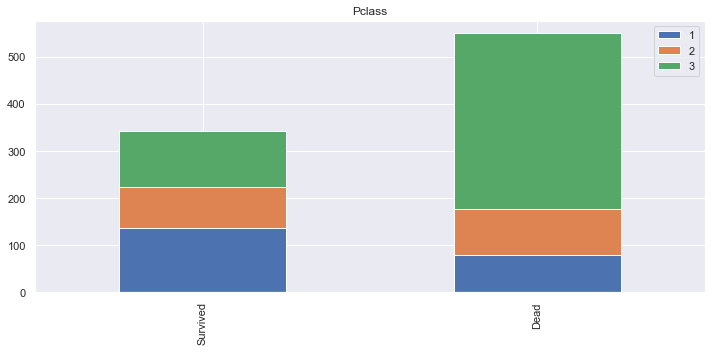

In [954]:
visualization('Pclass')

In [955]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [956]:
train[train['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

- Pclass : 1 일 경우 60%의 생존률
- Pclass : 2 일 경우 40%의 생존률
- Pclass : 3 일 경우 20%의 생존률<br>
∴ Pclass affects our target attribute

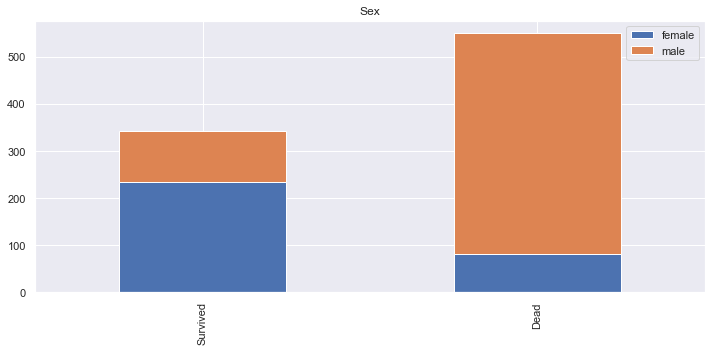

In [957]:
visualization('Sex')

In [958]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


- female 일 경우 70%의 생존률
- male 일 경우 18%의 생존률

### Feature Engineering

##### Sibsp & Parch

In [959]:
for vector in dataset :
    vector['FamilySize'] = vector['SibSp'] + vector['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Does having family member affect survival?

In [960]:
for vector in dataset :
    vector['Alone'] = 0
    vector.loc[vector['FamilySize'] == 1, 'Alone'] = 1
train[['Alone', 'Survived']].groupby(['Alone'], as_index = False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


There's <b>50%</b> chance of surviving if you are <b>alone</b>,<br>
while only <b>30%</b> of those who have family(<b>not alone</b>) survived.

In [961]:
train = train.drop(['SibSp'], axis = 1)
test = test.drop(['SibSp'], axis = 1)

train = train.drop(['Parch'], axis = 1)
test = test.drop(['Parch'], axis = 1)

train = train.drop(['FamilySize'], axis = 1)
test = test.drop(['FamilySize'], axis = 1)

##### Embarked

In [962]:
train['Embarked'].value_counts() + test['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

About 70% of the people Embarked from 'S', so fillna with 'S'

In [963]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

#####  Fare
Data of fare is missing in test.<br>
So fillna fare by median of group 'Pclass'

In [964]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

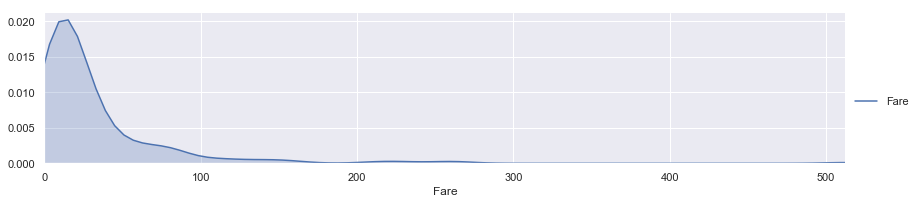

In [965]:
facet = sns.FacetGrid(train, aspect = 4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

Let's divide 'Fare' value in 4 groups.<br>
Each group will have same amount of data.

In [966]:
train['Fare_Division'] = pd.qcut(train['Fare'], 4)
test['Fare_Division'] = pd.qcut(test['Fare'], 4)

train[['Fare_Division', 'Survived']].groupby(['Fare_Division'], as_index = False).mean()

,Fare_Division,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


##### Age

In [967]:
# Extraction of 'title' information from train['Name']
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train = train.drop(['Name'], axis = 1)

test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test = test.drop(['Name'], axis = 1)

In [968]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Countess      1
Ms            1
Lady          1
Sir           1
Jonkheer      1
Capt          1
Mme           1
Name: Title, dtype: int64

Fillna age of data grouped by <b>title</b> with <b>mean</b> value

In [969]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [970]:
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(0, 1)

In [971]:
test[test['Age'].isnull()] # There's  no  other Ms. than her

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone,Fare_Division,Title
88,980,3,female,NaN,364856,7.75,NaN,Q,1,"(-0.001, 7.896]",Ms


In [972]:
# Fill her age with the median value of female.
test.loc[test['Age'].isnull(), 'Age'] = test[test['Sex'] == 'female']['Age'].median()

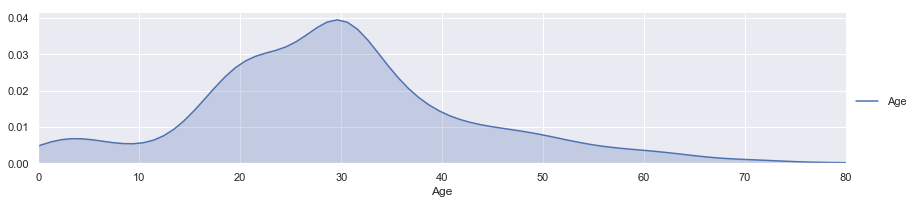

In [973]:
facet = sns.FacetGrid(train, aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [974]:
train['Age_Division'] = pd.qcut(train['Age'], 5)
test['Age_Division'] = pd.qcut(test['Age'], 5)

train[['Age_Division', 'Survived']].groupby(['Age_Division'], as_index = False).mean()

,Age_Division,Survived
0,"(0.419, 20.0]",0.459016
1,"(20.0, 26.0]",0.397727
2,"(26.0, 30.0]",0.239234
3,"(30.0, 38.0]",0.496552
4,"(38.0, 80.0]",0.370787


In [975]:
train.isnull().sum(), test.isnull().sum()

(PassengerId        0
 Survived           0
 Pclass             0
 Sex                0
 Age                0
 Ticket             0
 Fare               0
 Cabin            687
 Embarked           0
 Alone              0
 Fare_Division      0
 Title              0
 Age_Division       0
 dtype: int64, PassengerId        0
 Pclass             0
 Sex                0
 Age                0
 Ticket             0
 Fare               0
 Cabin            327
 Embarked           0
 Alone              0
 Fare_Division      0
 Title              0
 Age_Division       0
 dtype: int64)

### Data Cleansing

In [976]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone,Fare_Division,Title,Age_Division
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,0,"(-0.001, 7.91]",Mr,"(20.0, 26.0]"
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,0,"(31.0, 512.329]",Mrs,"(30.0, 38.0]"
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",Miss,"(20.0, 26.0]"
3,4,1,1,female,35.0,113803,53.1000,C123,S,0,"(31.0, 512.329]",Mrs,"(30.0, 38.0]"
4,5,0,3,male,35.0,373450,8.0500,NaN,S,1,"(7.91, 14.454]",Mr,"(30.0, 38.0]"


In [977]:
sexMap = {"male" : 0, "female" : 1}
train['Sex'] = train['Sex'].map(sexMap)
test['Sex'] = test['Sex'].map(sexMap)

In [978]:
embarkedMap = {"S" : 0, "C" : 1, "Q" : 2}
train['Embarked'] = train['Embarked'].map(embarkedMap)
test['Embarked'] = test['Embarked'].map(embarkedMap)

In [979]:
titleMap = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev" : 3, "Mlle" : 3, "Col" : 3, "Major" : 3, 
                "Ms" : 3, "Lady" : 3, "Jonkheer" : 3, "Mme" : 3, "Capt" : 3, "Sir" : 3, "Don" : 3, "Countess" : 3}
train['Title'] = train['Title'].map(titleMap)
test['Title'] = test['Title'].map(titleMap)

In [980]:
# Fare
train.loc[train['Fare'] <= 7.91 , 'Fare'] = 0
train.loc[(7.91 < train['Fare']) & (train['Fare'] <= 14.454) , 'Fare'] = 1
train.loc[(14.454 < train['Fare']) & (train['Fare'] <= 31) , 'Fare'] = 2
train.loc[31 < train['Fare'] , 'Fare'] = 3
    
test.loc[test['Fare'] <= 7.91 , 'Fare'] = 0
test.loc[(7.91 < test['Fare']) & (test['Fare'] <= 14.454) , 'Fare'] = 1
test.loc[(14.454 < test['Fare']) & (test['Fare'] <= 31) , 'Fare'] = 2
test.loc[31 < test['Fare'] , 'Fare'] = 3

In [981]:
train.loc[train['Age'] <= 20 , 'Age'] = 0
train.loc[(20 < train['Age']) & (train['Age'] <= 26) , 'Age'] = 1
train.loc[(26 < train['Age']) & (train['Age'] <= 30) , 'Age'] = 2
train.loc[(30 < train['Age']) & (train['Age'] <= 38) , 'Age'] = 3
train.loc[38 < train['Age'] , 'Age'] = 4

test.loc[test['Age'] <= 20 , 'Age'] = 0
test.loc[(20 < test['Age']) & (test['Age'] <= 26) , 'Age'] = 1
test.loc[(26 < test['Age']) & (test['Age'] <= 30) , 'Age'] = 2
test.loc[(30 < test['Age']) & (test['Age'] <= 38) , 'Age'] = 3
test.loc[38 < test['Age'] , 'Age'] = 4

In [982]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone,Fare_Division,Title,Age_Division
0,1,0,3,0,1.0,A/5 21171,0.0,NaN,0,0,"(-0.001, 7.91]",0,"(20.0, 26.0]"
1,2,1,1,1,3.0,PC 17599,3.0,C85,1,0,"(31.0, 512.329]",2,"(30.0, 38.0]"
2,3,1,3,1,1.0,STON/O2. 3101282,1.0,NaN,0,1,"(7.91, 14.454]",1,"(20.0, 26.0]"
3,4,1,1,1,3.0,113803,3.0,C123,0,0,"(31.0, 512.329]",2,"(30.0, 38.0]"
4,5,0,3,0,3.0,373450,1.0,NaN,0,1,"(7.91, 14.454]",0,"(30.0, 38.0]"


In [983]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone,Fare_Division,Title,Age_Division
0,892,3,0,3.0,330911,0.0,NaN,2,1,"(-0.001, 7.896]",0.0,"(28.6, 39.0]"
1,893,3,1,4.0,363272,0.0,NaN,0,0,"(-0.001, 7.896]",2.0,"(39.0, 76.0]"
2,894,2,0,4.0,240276,1.0,NaN,2,1,"(7.896, 14.454]",0.0,"(39.0, 76.0]"
3,895,3,0,2.0,315154,1.0,NaN,0,1,"(7.896, 14.454]",0.0,"(26.0, 28.6]"
4,896,3,1,1.0,3101298,1.0,NaN,0,0,"(7.896, 14.454]",2.0,"(21.0, 26.0]"


In [984]:
train = train.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare_Division', 'Age_Division'], axis = 1)
test = test.drop(['Ticket', 'Cabin', 'Fare_Division', 'Age_Division'], axis = 1)

In [985]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,0.0,0,0,0
1,1,1,1,3.0,3.0,1,0,2
2,1,3,1,1.0,1.0,0,1,1
3,1,1,1,3.0,3.0,0,0,2
4,0,3,0,3.0,1.0,0,1,0


### Logistic Regression & Gradient Descent Algorithm

In [1085]:
#Parameters needed : w0, w1, w2... : w_list = []

# w0 = -0.6317466601918094
# w1 = -0.05653350853635963
# w2 = 0.8556811494570249
# w3 = -0.03946554989032114
# w4 = -0.8449024756038757
# w5 = 0.2661752869088194
# w6 = 0.002126179261684902

import random
w_list = np.zeros(7)
for i in range(0, 7) :
    w_list[i] = random.random() * 2 - 1

#check randomly generated nums
for i in range(0, 7) :
    print(w_list[i])

# set learning rate alpha : a
a = 0.0001

-0.7552757342328797
0.815720115896232
0.12043191191364144
0.7330971968838962
-0.3650253057008821
0.13181275485655086
-0.2525169070304989


In [1086]:
train['tmp'] = 1
test['tmp'] = 1
train_df = pd.DataFrame(train, columns= ['tmp', 'Pclass', 'Sex', 'Age', 'Fare', 'Alone', 'Title'])
test_df = pd.DataFrame(test, columns= ['tmp', 'Pclass', 'Sex', 'Age', 'Fare', 'Alone', 'Title'])
target = train['Survived']

#train_list : [Survived, Pclass, Sex, ...]
train_list = train_df.values.tolist()
train_list = np.array(train_list)

#test_list = [Pclass, Sex]
test_list = test_df.values.tolist()
test_list = np.array(test_list)

target_list = target.values.tolist()
target_list = np.array(target_list)

print(train_list[0])
print(test_list[0])

[1. 3. 0. 1. 0. 0. 0.]
[1. 3. 0. 3. 0. 1. 0.]


In [1087]:
len(train_list), len(test_list)

(891, 418)

In [1088]:
cnt = 0
while(cnt < 300000) :
    Zi = train_list[:].dot(w_list) # Zi = w0 + w1 * x1 + w2 * x2 + ... + wn * xn   
    Hi = 1 / (1 + np.exp(-Zi)) # Hi = 1 / (1 + e^(-Zi)) 
    Hi_y = Hi - target_list
    for i in range(0, 7) :
        w_list[i] = w_list[i] - a * np.sum(train_list[:, i] * Hi_y) / 891
    cnt = cnt + 1

In [1089]:
answer_list = []
for i in range (0, 418) :
    Zx = test_list[i].dot(w_list)
    if(Zx >= 0) :
        answer_list.append(1)
    else :
        answer_list.append(0)

In [1090]:
cnt = 0
for answer in answer_list :
    if answer == 1 :
        cnt = cnt + 1
print(cnt)

144


In [1091]:
submission_df = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : answer_list
})

In [1092]:
submission_df.to_csv('submission.csv', index = False)

### Let's see if it works in other classifiers

In [1050]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

import numpy as np

In [1051]:
train_data.head()

,Pclass,Sex,Age,Fare,Alone,Title
0,3,0,1.0,0.0,0,0
1,1,1,3.0,3.0,0,2
2,3,1,1.0,1.0,1,1
3,1,1,3.0,3.0,0,2
4,3,0,3.0,1.0,1,0


In [1052]:
target = train['Survived']

### Testing

In [1053]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(train_data, target)

test.loc[test['Title'].isnull() == True, 'Title'] = 1
tmp_test_data = test.drop(['PassengerId', 'Embarked', 'tmp'], axis=1).copy()
prediction = clf.predict(tmp_test_data)

submission_df.loc[:, 'Survived2'] = prediction

In [1054]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test.loc[test['Title'].isnull() == True, 'Title'] = 1
tmp_test_data = test.drop(['PassengerId', 'Embarked', 'tmp'], axis=1).copy()
prediction = clf.predict(tmp_test_data)

submission_df.loc[:, 'Survived3'] = prediction

In [1055]:
clf = SVC(gamma='scale')
clf.fit(train_data, target)

test.loc[test['Title'].isnull() == True, 'Title'] = 1
tmp_test_data = test.drop(['PassengerId', 'Embarked', 'tmp'], axis=1).copy()
prediction = clf.predict(tmp_test_data)

submission_df.loc[:, 'Survived4'] = prediction

In [1056]:
submission_df.head()

,PassengerId,Survived1,Survived2,Survived3,Survived4
0,892,0,0,0,0
1,893,0,1,0,0
2,894,0,0,0,0
3,895,0,0,0,0
4,896,1,0,1,1


In [1057]:
submission_df['Ave'] = (submission_df['Survived1'] + submission_df['Survived2'] + submission_df['Survived3'] + submission_df['Survived4'])/4

In [1058]:
submission_df['Survived'] = 0
submission_df.loc[submission_df['Ave'] >= 0.5, 'Survived'] = 1

In [1059]:
submission_df.head()

,PassengerId,Survived1,Survived2,Survived3,Survived4,Ave,Survived
0,892,0,0,0,0,0.00,0
1,893,0,1,0,0,0.25,0
2,894,0,0,0,0,0.00,0
3,895,0,0,0,0,0.00,0
4,896,1,0,1,1,0.75,1


In [1060]:
submission_list = submission_df['Survived'].values.tolist()
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : submission_list
})

In [1061]:
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [1062]:
submission[submission['Survived'] == 1].count()

PassengerId    153
Survived       153
dtype: int64

In [1063]:
submission.to_csv('submission.csv', index = False)

In [1064]:
submission.shape

(418, 2)